# Exploritary Data Analysis for the candidates dataset
only the candidates which have some jobs matches

## Import libraries

In [1]:
import re
import json
import pymorphy3
import tokenize_uk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Load data

In [44]:
df = pd.read_csv('../../data/prepared_candidates/candidates_prepared.csv')
df.head()

,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id
0,1c,"Розробник 1с/BAS, всі українські конфігурації,...",NaN,NaN,Other,intermediate,11.0,"\nРозробник 1с/BAS, всі українські конфігураці...",uk,dcaeffc4-1d1f-5754-a567-f478f0c8aa6f
1,1c developer,Еко - маркет Торгівля роздрібна 1 рік 9 місяці...,NaN,Hillel IT school Java Basic and Java Pro 2022\...,SQL,pre,11.0,Hillel IT school Java Basic and Java Pro 2022\...,uk,2767ca2d-4bca-5b41-b9e0-e42ad5700b6f
2,1C developer (purpose: switch to Golang/Ruby),Займаюся автоматизацією підприємств вже понад ...,"Найголовніше - це атмосфера в колективі, також...","Самостійно приймати рішення, брати відповідаль...",Ruby,upper,7.0,"Самостійно приймати рішення, брати відповідаль...",uk,ff07df1f-5268-5865-8f30-1cc660786494
3,1C програміст,Шукаю роботу з метою розвитку та вдосконалення...,В першу чергу мене цікавить можливість розвитк...,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",SQL,intermediate,0.5,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",uk,da4b79b1-fbc5-5dfe-bba0-58339f262d11
4,1C програміст,Шукаю роботу по напрямку junior С++. Маю досві...,"Цікаві проекти, саморозвиток.",NaN,Data Engineer,intermediate,6.0,\nШукаю роботу по напрямку junior С++. Маю дос...,uk,b118a952-cbe6-58ac-824a-10de5322570c


In [45]:
# unique_candidates = list(json.load(open('../../data/final_groups/groups.json')).keys())
# print("Unique candidates count:",len(unique_candidates))

In [46]:
# df = df[df['id'].isin(unique_candidates)].reset_index(drop=True)
# print("Candidates count after filtering:",len(df['id'].unique()))
# df.head()

## General dataset statistics

In [47]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234480 entries, 0 to 234479
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Position          234480 non-null  object 
 1   Moreinfo          234480 non-null  object 
 2   Looking For       112905 non-null  object 
 3   Highlights        118211 non-null  object 
 4   Primary Keyword   234432 non-null  object 
 5   English Level     233946 non-null  object 
 6   Experience Years  234480 non-null  float64
 7   CV                234480 non-null  object 
 8   CV_lang           234480 non-null  object 
 9   id                234480 non-null  object 
dtypes: float64(1), object(9)
memory usage: 17.9+ MB


In [48]:
# unique values counts for each column
for col in df.columns:
    print(col,'\t', len(df[col].unique()))

Position 	 58341
Moreinfo 	 234365
Looking For 	 109524
Highlights 	 117700
Primary Keyword 	 42
English Level 	 8
Experience Years 	 15
CV 	 234480
CV_lang 	 2
id 	 234480


In [49]:
# general statistics
df.describe()

,Experience Years
count,234480.000000
mean,3.726164
std,3.297389
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,11.000000


## Additional function

In [50]:
def hist_with_stat_line(df, col, title):
    df[col].str.len().plot(kind= 'hist',bins=100, figsize=(15,5), color='green', alpha=0.5, title=title)
    plt.axvline(df[col].str.len().median(), color='red', linestyle='dashed', linewidth=1, label='median')
    plt.axvline(df[col].str.len().quantile(0.25), color='black', linestyle='dashed', linewidth=1, label='25%')
    plt.axvline(df[col].str.len().quantile(0.75), color='black', linestyle='dashed', linewidth=1, label='75%')
    plt.axvline(df[col].str.len().mean(), color='blue', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    plt.show()

## Statistics and plots for each column

### Position column
`manual written position titles`

In [51]:
# min, max, mean, median, 25%, 50%, 75% for length of Position column
df['Position'].str.len().describe()

count    234480.000000
mean         21.895125
std          12.117533
min           1.000000
25%          15.000000
50%          19.000000
75%          25.000000
max         254.000000
Name: Position, dtype: float64

<Axes: title={'center': 'Top 20 most popular positions'}, xlabel='Position'>

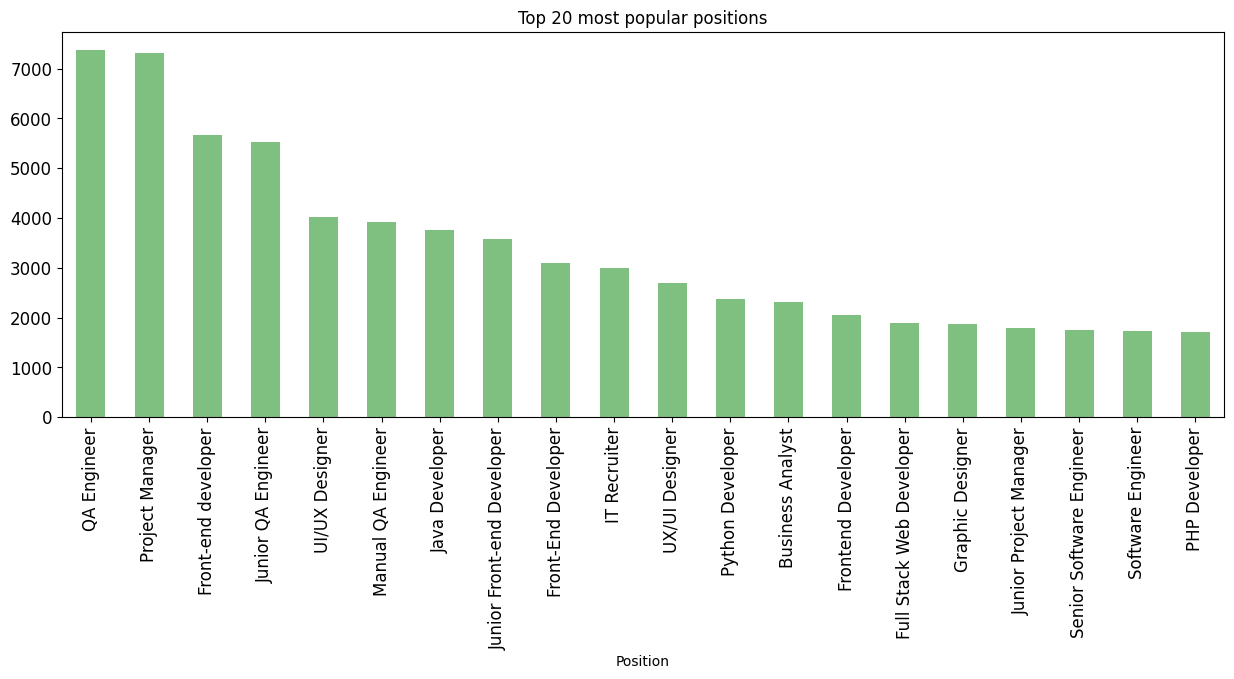

In [52]:
# top 20 most popular positions as a bar chart
df['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions', 
                                        fontsize=12, color='green', alpha=0.5)


In [53]:
# tail 20 positions
df['Position'].value_counts()[-20:]

Position
Full Stack .NET C# Angular Developer                        1
Full Stack .Net/C# Developer                                1
Fullstack .Net/C#/JS/jQuery/SQL developer                   1
Full Stack (.NET Core) Team/Tech Lead                       1
Full Stack .Net/C#/TS Developer                             1
full-stack .NET developer                                   1
Full stack .Net developer                                   1
Full stack .NETdeveloper                                    1
Full Stack .NET Developer (.NET and Angular 2+)             1
Fullstack/.NET Developer                                    1
Full Stack .Net developer                                   1
Full Stack (.NET) developer                                 1
Full Stack.NET developer                                    1
FullStack/.NET Developer                                    1
Full Stack .NET Developer + Angular                         1
Full Stack .NET Developer/Angular/React                     1

we can see that the most common position and some of the rarest positions can be really similar due to manual writing of the position titles.

<Axes: title={'center': 'Top 20 most popular positions. English language'}, xlabel='Position'>

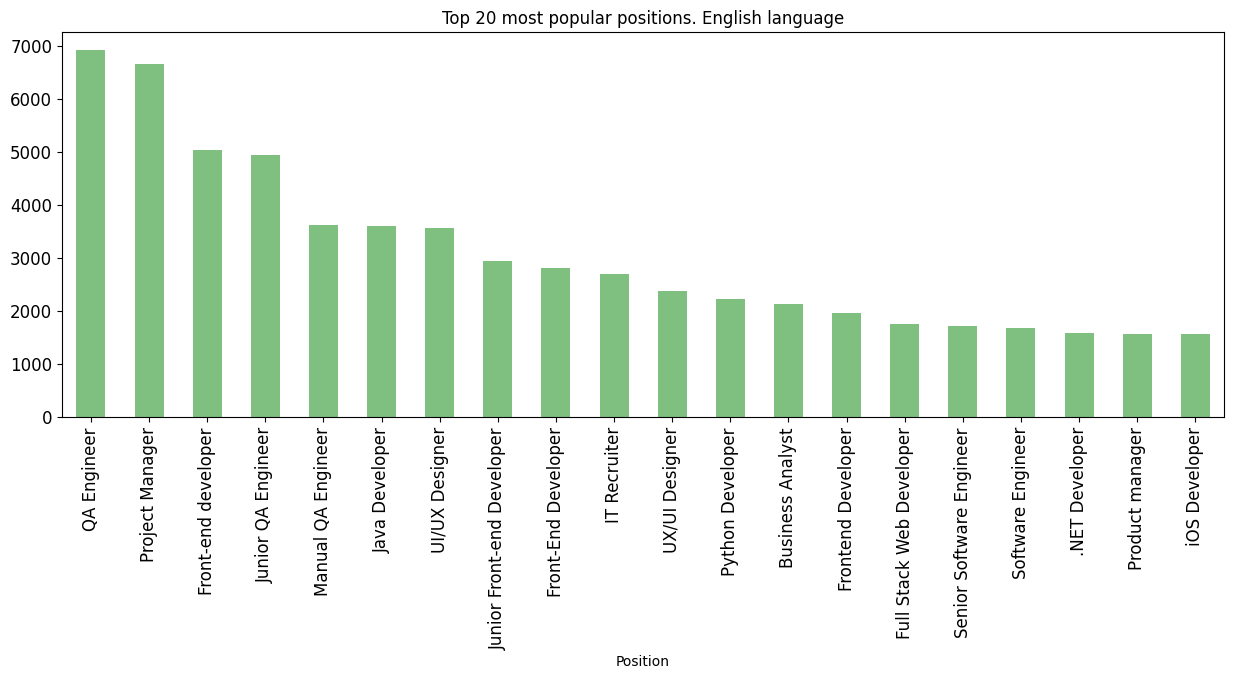

In [54]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='en']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. English language', 
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular positions. Ukrainian language'}, xlabel='Position'>

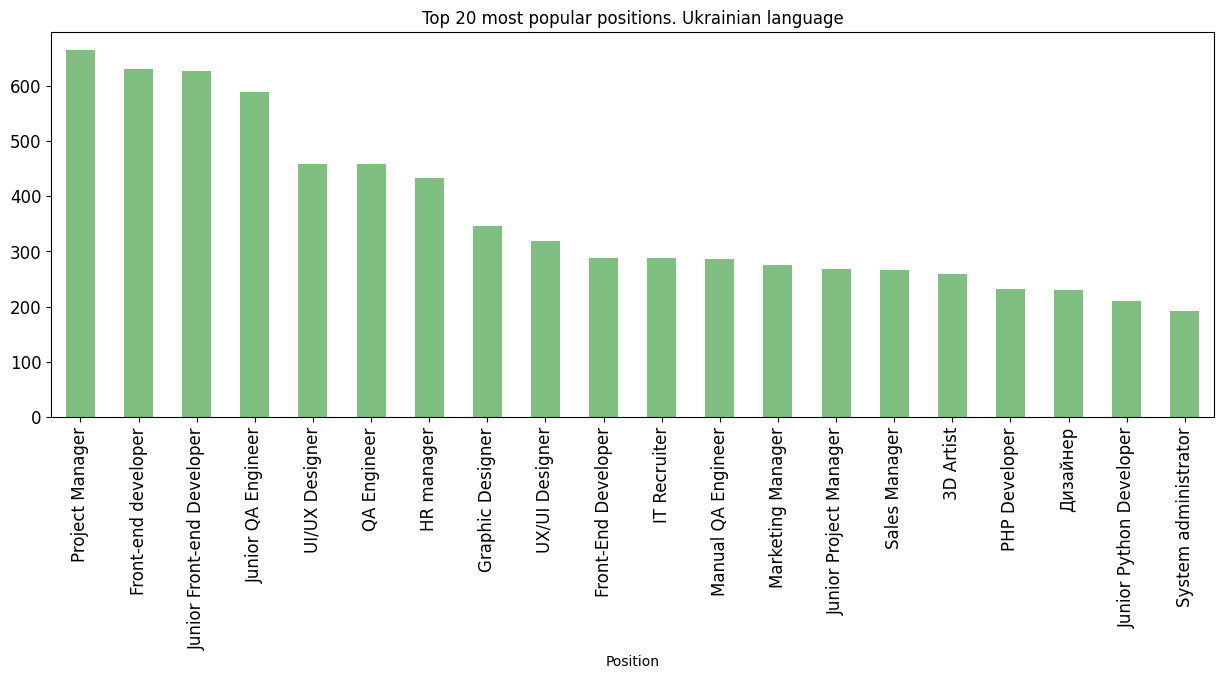

In [55]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='uk']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. Ukrainian language', 
                                        fontsize=12, color='green', alpha=0.5)

### Moreinfo column
`manual candidate's info`

In [56]:
# Moreinfo column length statistics
df['Moreinfo'].str.len().describe()

count    234480.000000
mean        685.666099
std         529.506438
min           1.000000
25%         306.000000
50%         520.000000
75%         892.000000
max        2616.000000
Name: Moreinfo, dtype: float64

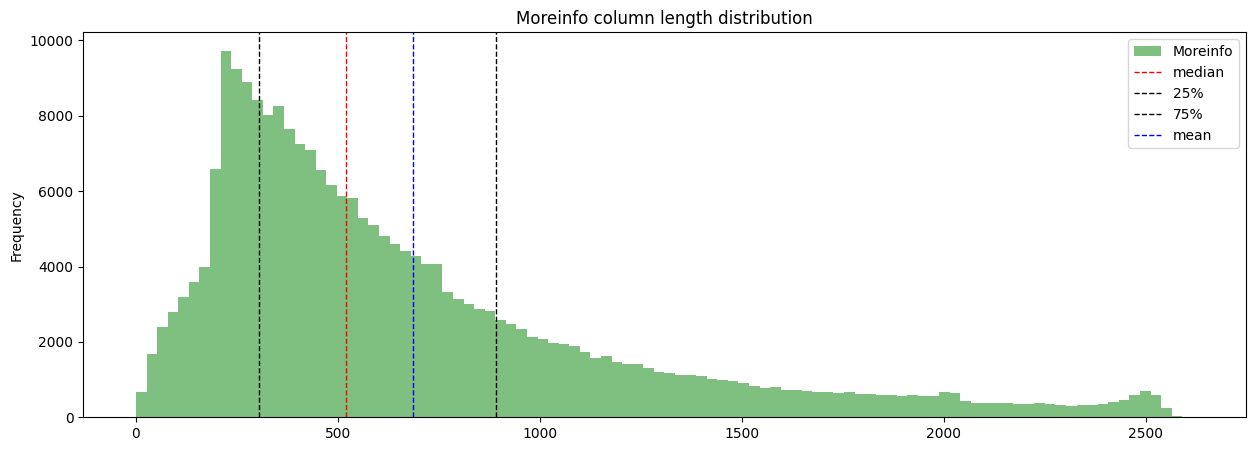

In [57]:
# distribution of Moreinfo column length
hist_with_stat_line(df, 'Moreinfo', 'Moreinfo column length distribution')

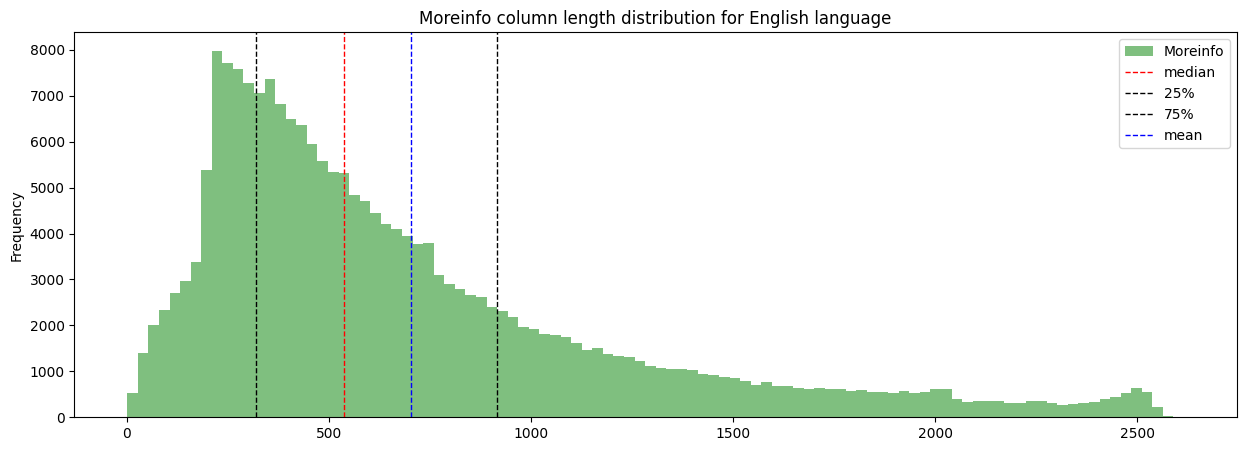

In [58]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Moreinfo', 'Moreinfo column length distribution for English language')

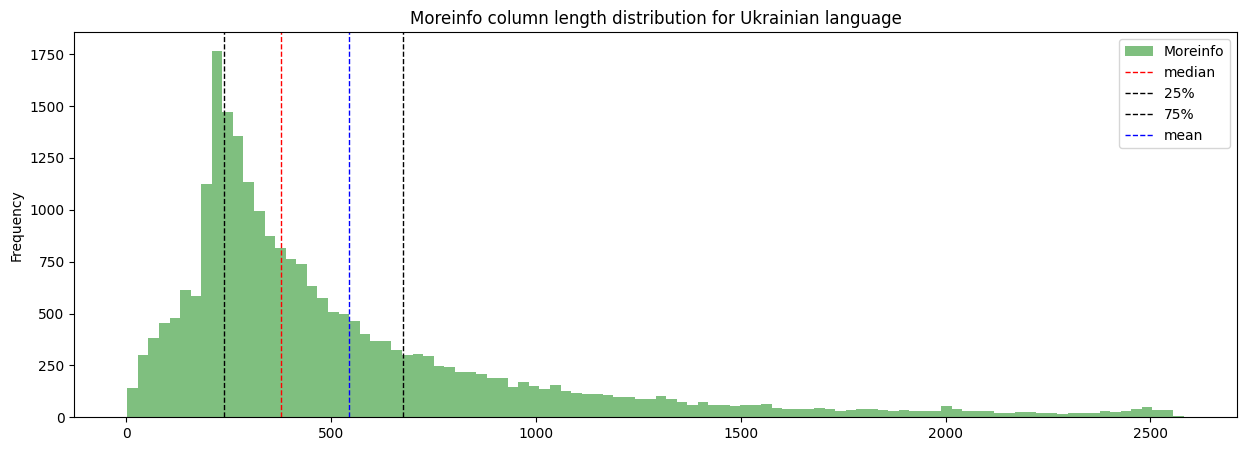

In [59]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Moreinfo', 'Moreinfo column length distribution for Ukrainian language')

### Looking For column
`manual written what people search`

In [60]:
# Looking For column length statistics
df['Looking For'].str.len().describe()

count    112905.000000
mean        160.798530
std         159.801295
min           1.000000
25%          67.000000
50%         117.000000
75%         201.000000
max        2496.000000
Name: Looking For, dtype: float64

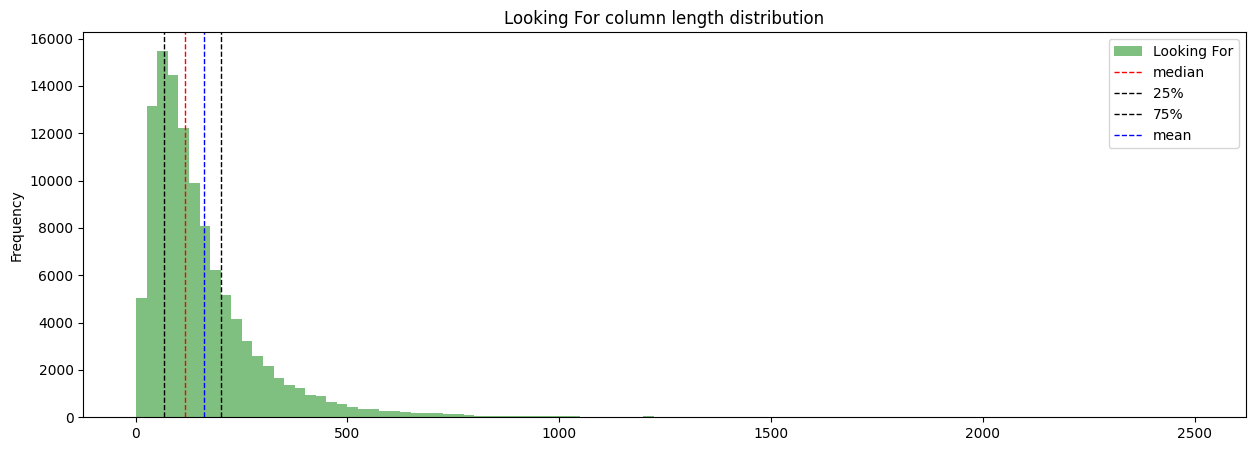

In [61]:
# distribution of Looking For column length
hist_with_stat_line(df, 'Looking For', 'Looking For column length distribution')

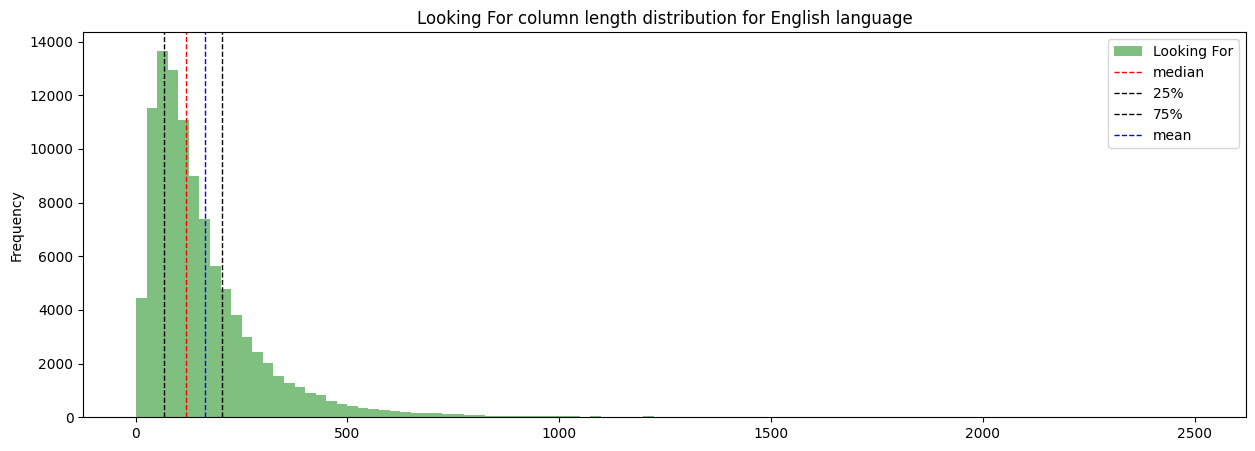

In [62]:
# distribution of Looking For column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Looking For', 'Looking For column length distribution for English language')

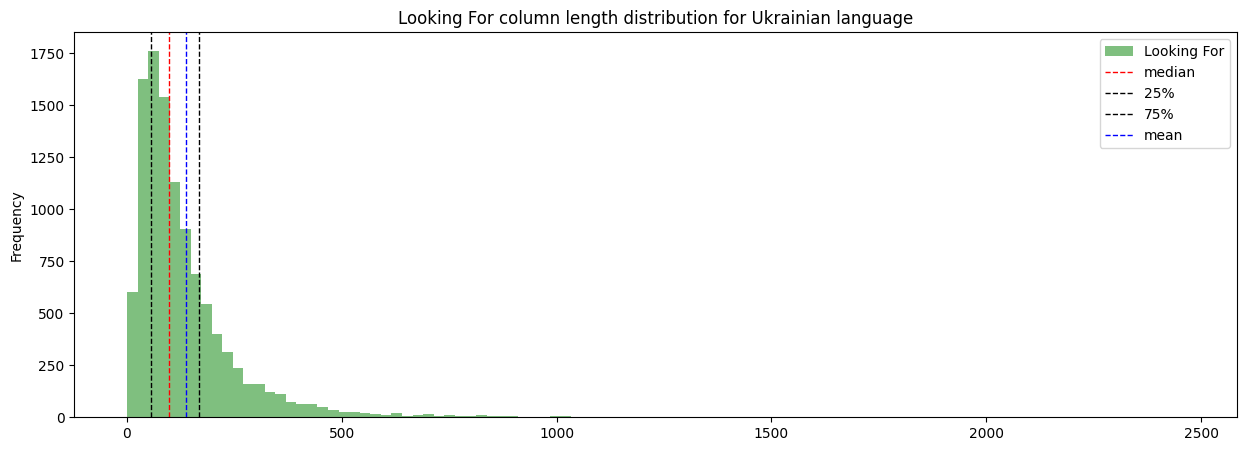

In [63]:
# distribution of Looking For column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Looking For', 'Looking For column length distribution for Ukrainian language')

### Highlights column
`manual written candidate's highlights`

In [64]:
# Highlights column length statistics
df['Highlights'].str.len().describe()

count    118211.000000
mean        313.162261
std         311.999497
min           1.000000
25%         117.000000
50%         218.000000
75%         396.000000
max        2500.000000
Name: Highlights, dtype: float64

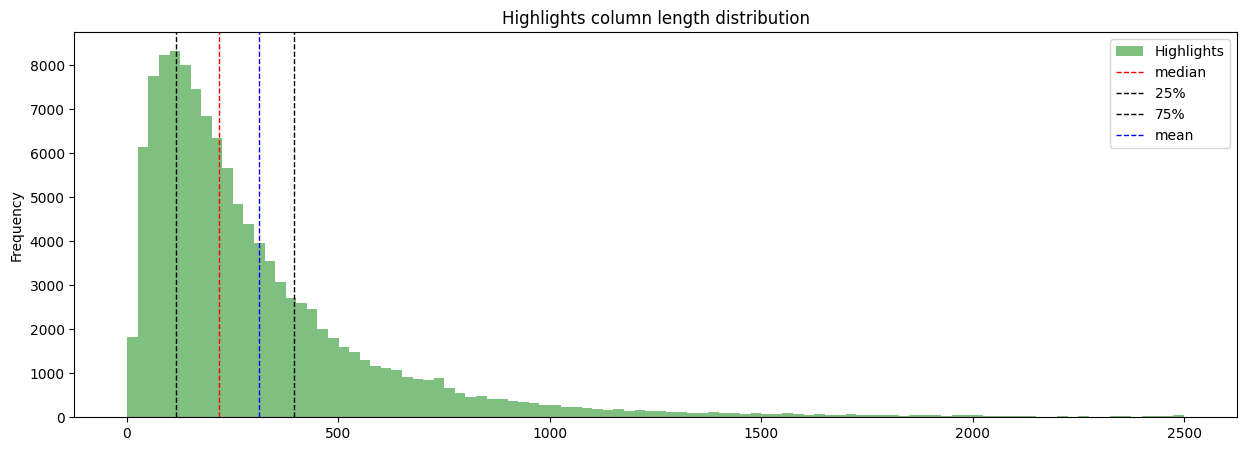

In [65]:
# distribution of Highlights column length
hist_with_stat_line(df, 'Highlights', 'Highlights column length distribution')

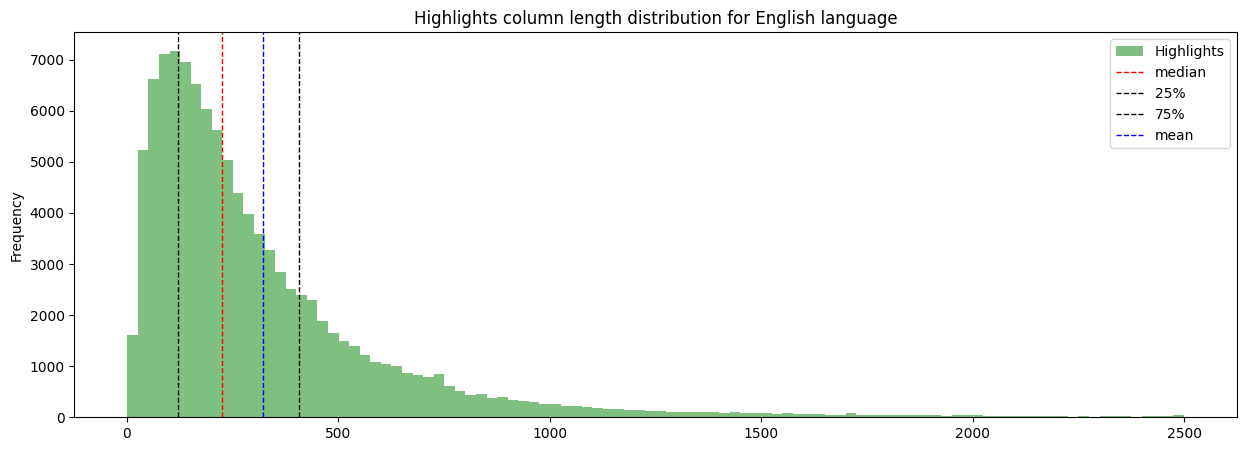

In [66]:
# distribution of Highlights column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Highlights', 'Highlights column length distribution for English language')

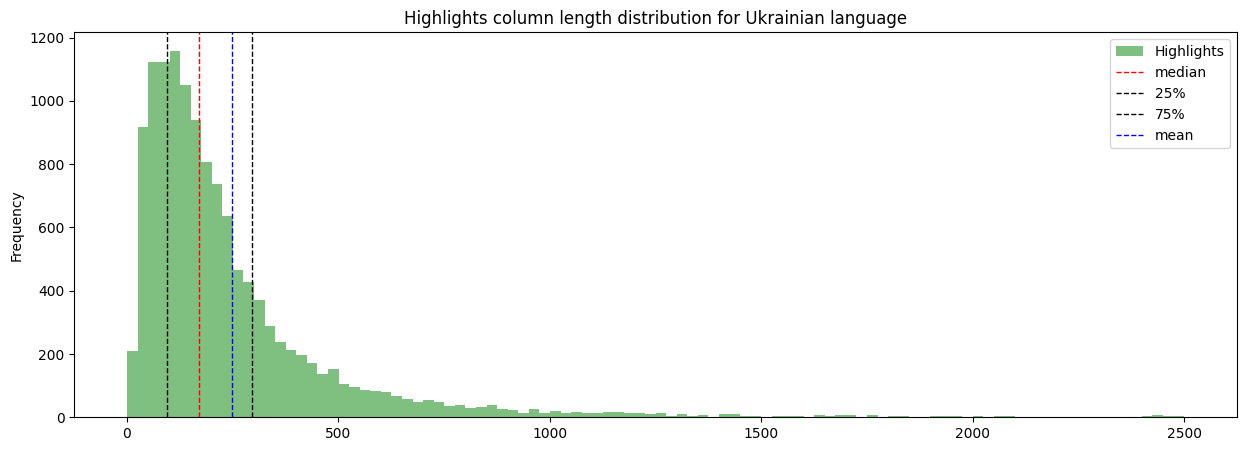

In [67]:
# distribution of Highlights column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Highlights', 'Highlights column length distribution for Ukrainian language')

## Primary Keyword column
`job profile type`

In [68]:
# unique Primary Keyword count
print("Unique Primary Keyword count:",len(df['Primary Keyword'].unique()))

Unique Primary Keyword count: 42


<Axes: title={'center': 'Top 20 most popular Primary Keywords'}, xlabel='Primary Keyword'>

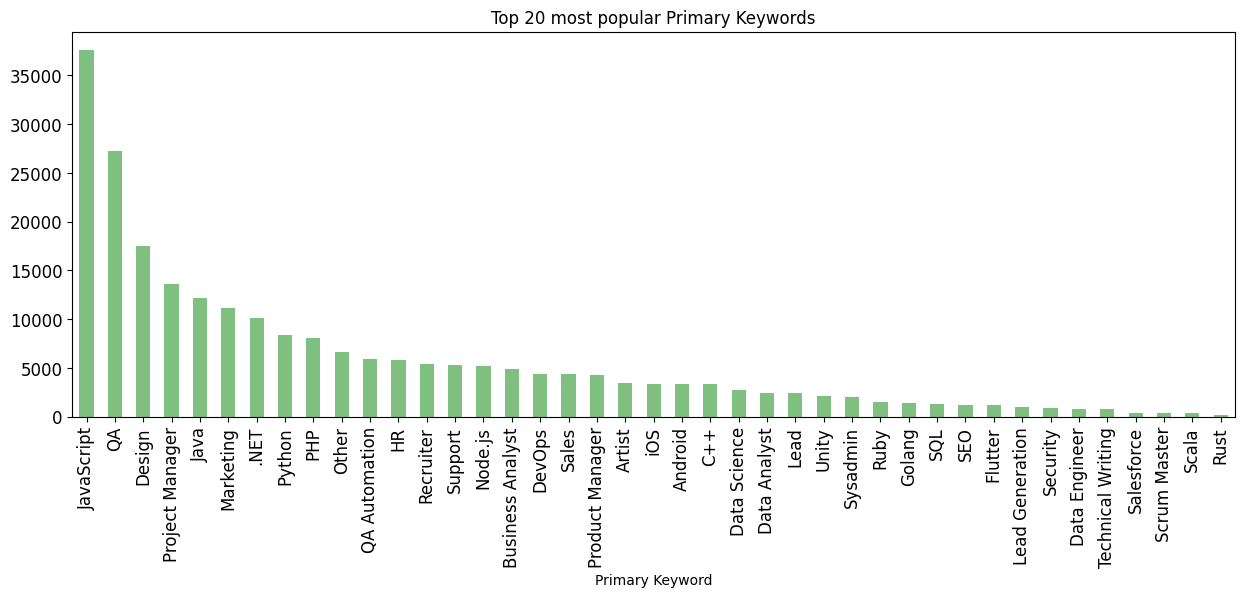

In [69]:
# primary keyword bar chart
df['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. English language'}, xlabel='Primary Keyword'>

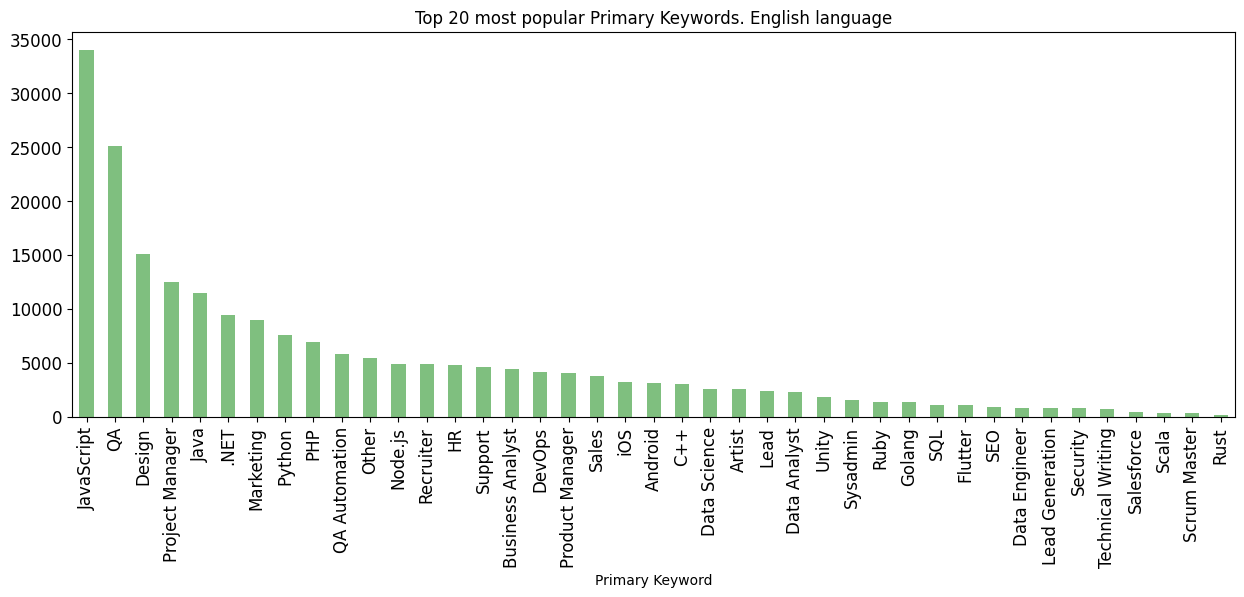

In [70]:
# primary keyword bar chart for English language
df[df['CV_lang']=='en']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. Ukrainian language'}, xlabel='Primary Keyword'>

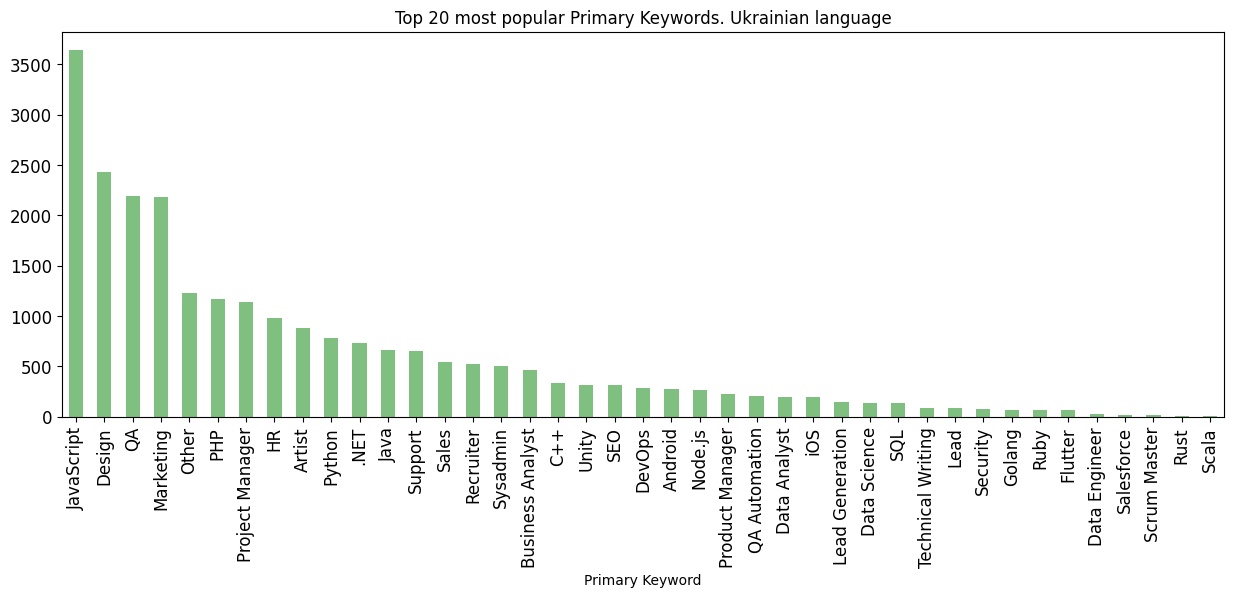

In [71]:
# primary keyword bar chart for Ukrainian language
df[df['CV_lang']=='uk']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### English Level column
`candidate's english level`

In [72]:
# unique English Level count
print("Unique English Level count:",len(df['English Level'].unique()))

Unique English Level count: 8


<Axes: title={'center': 'English Level count'}, xlabel='English Level'>

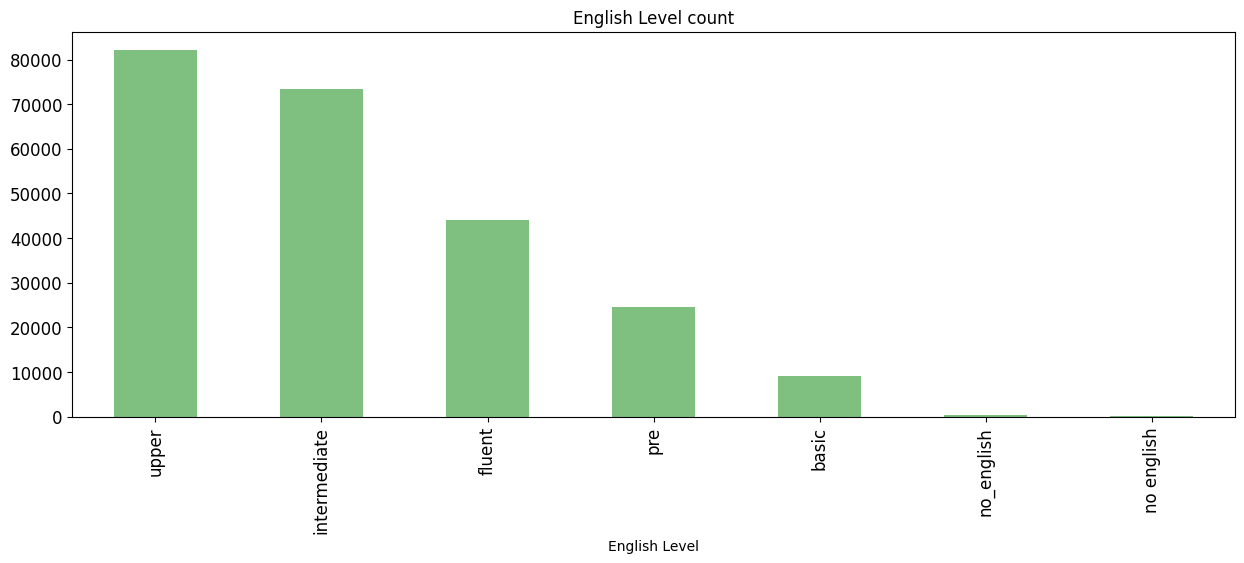

In [73]:
# English Level bar chart
df['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. English language'}, xlabel='English Level'>

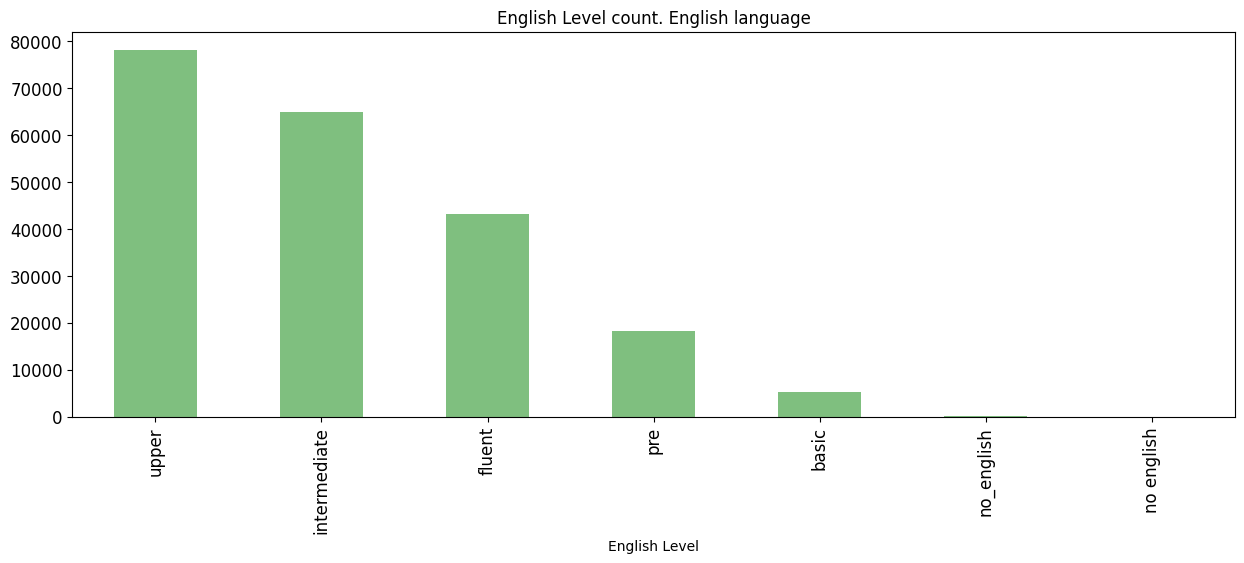

In [74]:
# English Level bar chart for English language
df[df['CV_lang']=='en']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. English language',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. Ukrainian language'}, xlabel='English Level'>

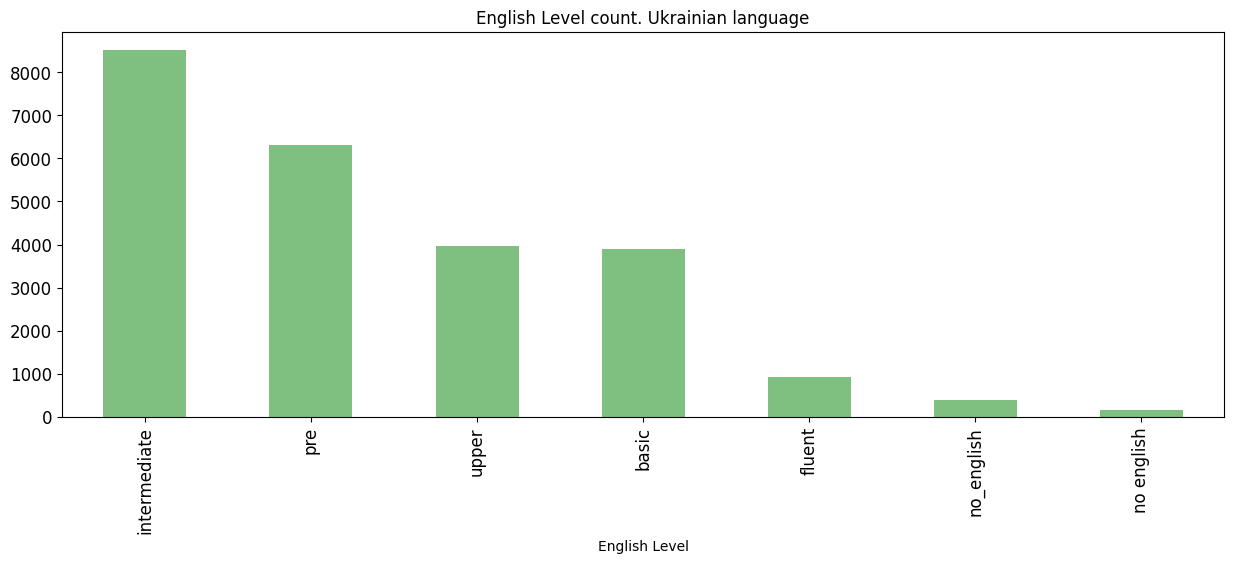

In [75]:
# English Level bar chart for Ukrainian language
df[df['CV_lang']=='uk']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. Ukrainian language',
                                        fontsize=12, color='green', alpha=0.5)

### Experience Years column
`candidate's experience years`

In [76]:
# general statistics for Experience Years column
df['Experience Years'].describe()

count    234480.000000
mean          3.726164
std           3.297389
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          11.000000
Name: Experience Years, dtype: float64

<Axes: title={'center': 'Experience Years count'}, xlabel='Experience Years'>

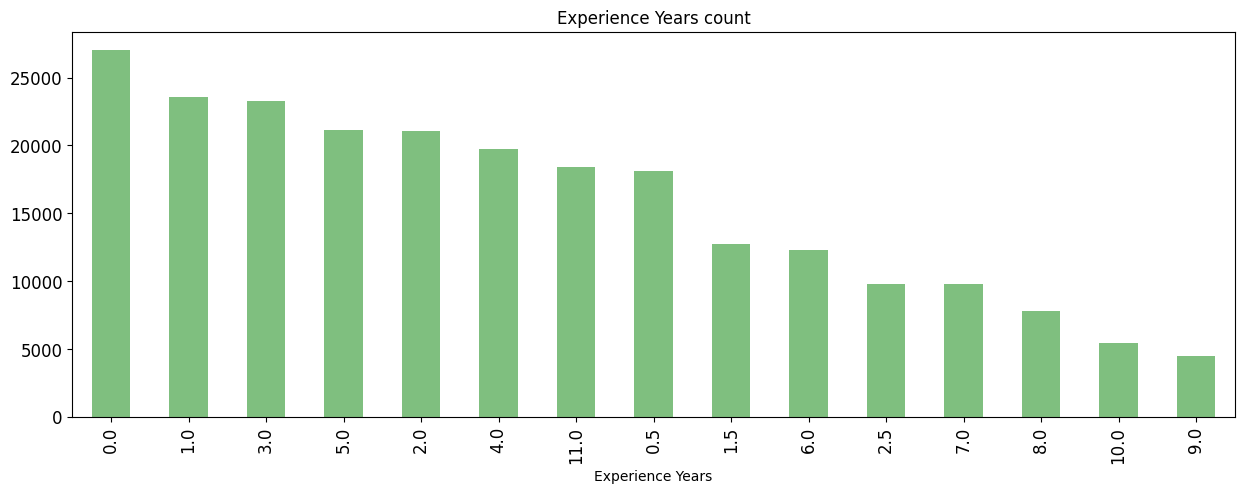

In [77]:
# bar chart for Experience Years column
df['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. English language'}, xlabel='Experience Years'>

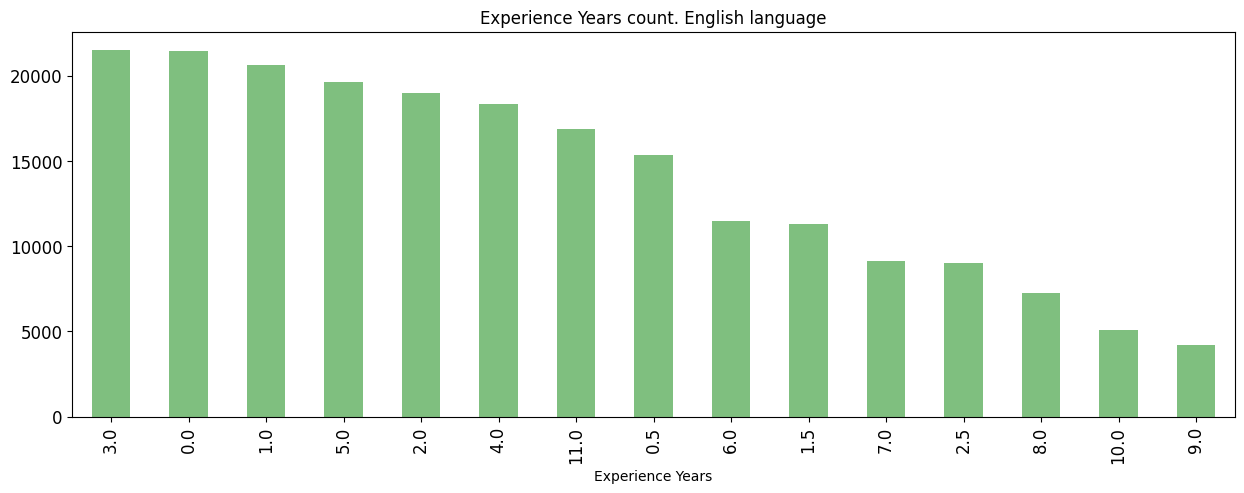

In [78]:
# bar chart for Experience Years column for English language
df[df['CV_lang']=='en']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. Ukrainian language'}, xlabel='Experience Years'>

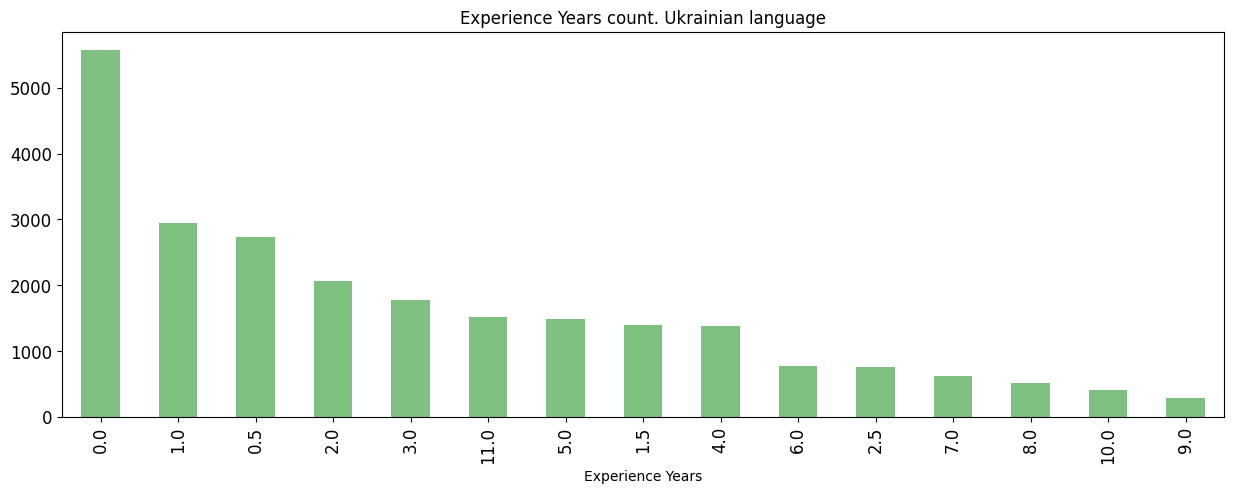

In [79]:
# bar chart for Experience Years column for Ukrainian language
df[df['CV_lang']=='uk']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### CV column
`syntetic created column from: Highlights + Moreinfo + Looking For columns`

In [80]:
# CV column length statistics
df['CV'].str.len().describe()

count    234480.000000
mean        922.970526
std         672.358578
min           6.000000
25%         438.000000
50%         728.000000
75%        1204.000000
max        7372.000000
Name: CV, dtype: float64

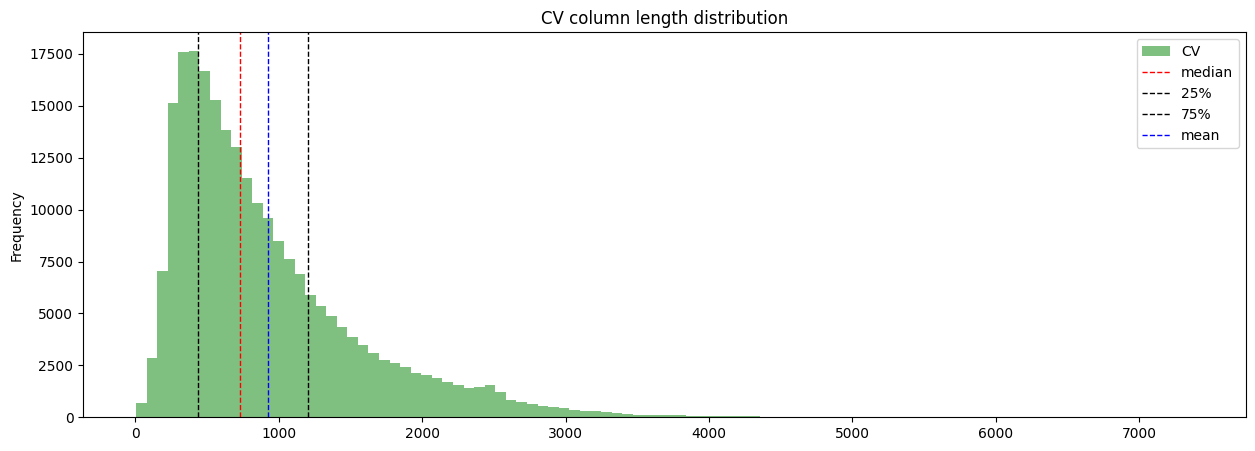

In [81]:
# distribution of CV column length
hist_with_stat_line(df, 'CV', 'CV column length distribution')

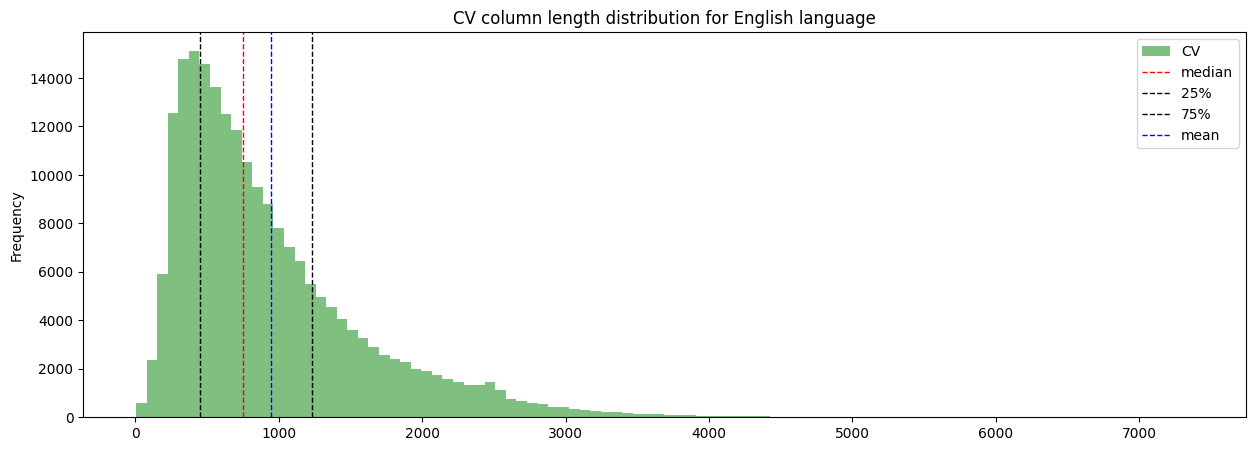

In [82]:
# distribution of CV column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'CV', 'CV column length distribution for English language')

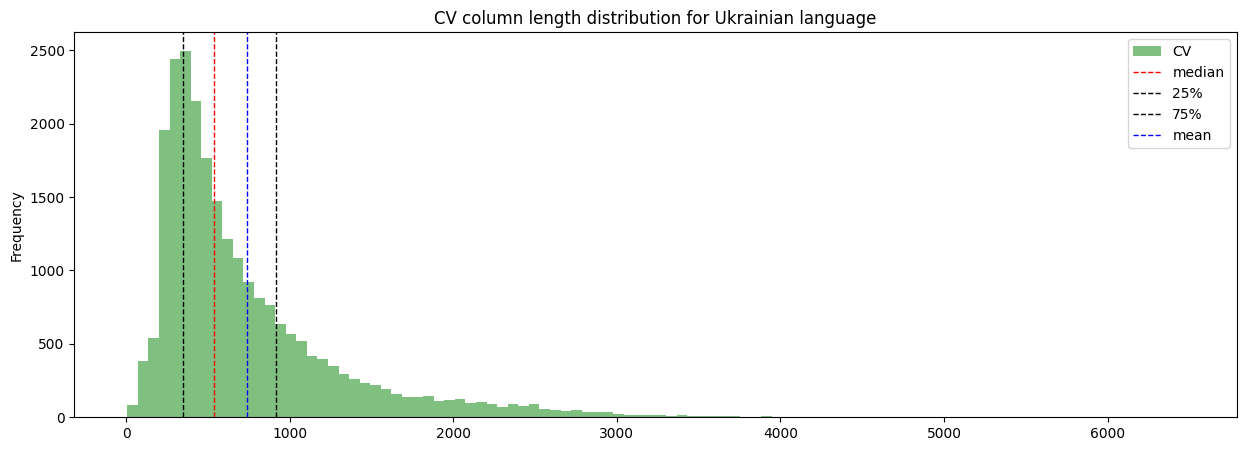

In [83]:
# distribution of CV column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'CV', 'CV column length distribution for Ukrainian language')

### CV_lang column
`syntetic created column from CV column for language detection`

In [84]:
df['CV_lang'].value_counts()

CV_lang
en    210250
uk     24230
Name: count, dtype: int64

<Axes: title={'center': 'CV_lang column value counts'}, ylabel='count'>

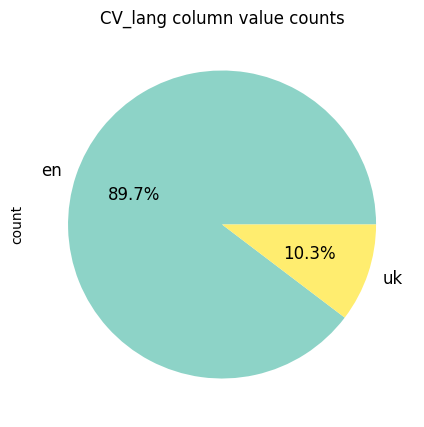

In [85]:
# CV_lang column value counts as a pie chart
df['CV_lang'].value_counts().plot(kind='pie', figsize=(5,5), title='CV_lang column value counts', fontsize=12, autopct='%1.1f%%', colormap='Set3')

### id column
`synthetic created column for identifcation each candidate`

## Morphological analysis of CVs(Ukrainian language for detecting gender features)

In [43]:
morph = pymorphy3.MorphAnalyzer(lang='uk')
morph.parse("працювала")[0].tag.gender

'femn'

In [44]:
morph.parse("працювала")[0].tag.POS

'VERB'

In [45]:
# detect percantage where we have feminitive in Ukrainian CVs

morph = pymorphy3.MorphAnalyzer(lang='uk')

def detect_feminitive(text):
    words = tokenize_uk.tokenize_uk.tokenize_words(text)
    verbs = [morph.parse(word)[0].word for word in words if morph.parse(word)[0].tag.POS == 'VERB']
    femn_verb_len = len([morph.parse(word)[0].tag.gender for word in verbs if morph.parse(word)[0].tag.gender == 'femn'])
    if femn_verb_len == 0 or len(verbs) == 0:
        return 0
    
    gender = femn_verb_len/len(verbs)
    # if gender > 0.5:
    #     print(text)
    #     print()
    return 1 if gender > 0.5 else 0

count = 0
ukr_cv = df[df['CV_lang'] == 'uk']['CV'].values
for cv_text in tqdm(ukr_cv):
    count+=detect_feminitive(cv_text)
print("Count of feminitive in Ukrainian CVs:", count)
print("Percentage of feminitive in Ukrainian CVs:", count/len(ukr_cv))

100%|██████████| 12901/12901 [00:51<00:00, 250.32it/s]

Count of feminitive in Ukrainian CVs: 708
Percentage of feminitive in Ukrainian CVs: 0.054879466708007134


## Protected groups detect by languages(other than gender)

In [66]:
"християнин"[:-2]

'християн'

In [69]:
def protected_groups_uk(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    gender_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    gender_detect_exp = []
    for val in values:
        if re.search(r'сімейний статус', val) or re.search(r'заміжн', val) or re.search(r'одружен', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'військов', val) or re.search(r'військ', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'релігія', val) or any([re.search(f'{rel[:-2] if len(rel)>5 else rel}.*', val)for rel in open("../../data/protected_groups/religion_ukr.txt").read().split("\n")]):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'мені \d{1,3} років', val.lower()):
            age_count+=1
            age_detect_exp.append(val)
        if re.search(r'жінк', val.lower()) or re.search(r'чоловік', val.lower()):
            gender_count+=1
            gender_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", 100*marital_count/len(values))
    # print("EXAMPLES:")
    # for exp in marital_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nMilitary status count:", military_count)
    print("Military status:", 100*military_count/len(values))
    print("EXAMPLES:")
    # for exp in military_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", 100*religion_count/len(values))
    print("EXAMPLES:")
    # for exp in religion_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nAge status count:", age_count)
    print("Age status:", 100*age_count/len(values))
    print("EXAMPLES:")
    # for exp in age_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nGender status count:", gender_count)
    print("Gender status:", 100*gender_count/len(values))
        
    
def protected_groups_en(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    gender_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    gender_detect_exp = []
    for val in values:
        if re.search(r'marital status', val) or re.search(r'married', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'military', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'religion', val) or any([re.search(rel, val) for rel in open("../../data/protected_groups/religion_en.txt").read().split("\n")]):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'I am \d{1,3} years', val):
            age_count+=1
            age_detect_exp.append(val)
        if re.search(r'female', val) or re.search(r'male', val):
            gender_count+=1
            gender_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", 100*marital_count/len(values))
    print("EXAMPLES:")
    # for exp in marital_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nMilitary status count:", military_count)
    print("Military status:", 100*military_count/len(values))
    print("EXAMPLES:")
    # for exp in military_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", 100*religion_count/len(values))
    print("EXAMPLES:")
    # for exp in religion_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nAge status count:", age_count)
    print("Age status:", 100*age_count/len(values))
    print("EXAMPLES:")
    # for exp in age_detect_exp[:5]:
    #     print(exp)
    #     print()
    print("\nGender status count:", gender_count)
    print("Gender status:", 100*gender_count/len(values))

print("Ukrainian CVs:")
protected_groups_uk(df[df['CV_lang'] == 'uk']['CV'].values)
print("English CVs:")
protected_groups_en(df[df['CV_lang'] == 'en']['CV'].values)

Ukrainian CVs:
Marital status count: 5
Marital status: 0.03875668552825362

Military status count: 41
Military status: 0.3178048213316797
EXAMPLES:

Religion status count: 3
Religion status: 0.023254011316952174
EXAMPLES:

Age status count: 29
Age status: 0.22478877606387102
EXAMPLES:

Gender status count: 50
Gender status: 0.38756685528253626
English CVs:
Marital status count: 15
Marital status: 0.012787832803348708
EXAMPLES:

Military status count: 221
Military status: 0.18840740330267094
EXAMPLES:

Religion status count: 174
Religion status: 0.148338860518845
EXAMPLES:

Age status count: 129
Age status: 0.10997536210879888
EXAMPLES:

Gender status count: 33
Gender status: 0.028133232167367156


From analyses we found that we need to filter out items with sensative information: 
- by marital status
- by age
- by religion

For military status we can't filter out because it's looks like it is false position items and it isn't related to military status.

In [47]:
# check if we have phone number in CV
def detect_phone(text):
    if re.search(r'380\d{9}', text.replace(' ','')) or re.search(r'0\d{9}', text.replace(' ','')):
        print(text)
        return 1
    return 0

cv_list = df['CV'].values
count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_phone(cv_text)
print("Count of CVs with phone number in CVs:", count)
print("Percentage of CVs with phone number in CVs:", count/len(cv_list))

100%|██████████| 130200/130200 [00:01<00:00, 91581.47it/s]

Count of CVs with phone number in CVs: 0
Percentage of CVs with phone number in CVs: 0.0


In [48]:
def detect_email(text):
    if re.search(r'[\w\.-]+@[\w\.-]+', text):
        return 1
    return 0

count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_email(cv_text)
print("Count of CVs with email in CVs:", count)
print("Percentage of CVs with email in CVs:", count/len(cv_list))

100%|██████████| 130200/130200 [00:06<00:00, 21196.01it/s]

Count of CVs with email in CVs: 0
Percentage of CVs with email in CVs: 0.0


We need to drop information with phone numbers and emails too.

### Check by names

In [49]:
#!pip install -q translitua
from translitua import translit

In [50]:
with open('../../data/protected_groups/ukr_names/fem_fname.txt', 'r') as f:
    names = [ name.split()[0] for name in f.read().splitlines()]
names[0], len(names)


('Абігайль', 1823)

In [51]:
with open('../../data/protected_groups/ukr_names/masc_fname.txt', 'r') as f:
    male_names = [ name.split()[0] for name in f.read().splitlines()]
male_names[0], len(male_names)

('Аарон', 3474)

In [52]:
# concat all names
names.extend(male_names)
names[0], len(names)

('Абігайль', 5297)

In [53]:
# transliterate all names
names_eng = [translit(name) for name in names]   
names_eng[0], len(names_eng)

('Abihail', 5297)

In [54]:
# # extend eng names with ukr names
# names.extend(names_eng)

In [55]:
len(names)

5297

In [56]:
# check if we have names in CV
def detect_name(text, names):
    words = tokenize_uk.tokenize_uk.tokenize_words(text)
    names = [word for word in words if word in names]
    if len(names) > 0:
        return (1, list(set(names)), text)
    return (0, [],"")

In [57]:
cv_list = df[df["CV_lang"] == "uk"]['CV'].values

BLACK_LIST = ["Пет", "Рада", "Тім", "Слава", "Франка", "Вер", "Стем", "Сі", "Август", "Джанго", "Джинні", "Че"]

count_ukr = 0
ukr_names = []
ukr_cv_names = {}
for cv_text in tqdm(df[df["CV_lang"] == "uk"]['CV'].values):
    result = detect_name(cv_text, list(set(names)-set(BLACK_LIST)))
    count_ukr += result[0]
    if result[0] > 0:
        ukr_names.extend(result[1])
        for name in result[1]:
            if name in ukr_cv_names:
                ukr_cv_names[name].append(result[2])
            else:
                ukr_cv_names[name] = [result[2]]
print("Ukrainian CVs:")
print("Count of CVs with name in CVs:", count_ukr)
print("Percentage of CVs with name in CVs:", 100*count_ukr/len(cv_list))

100%|██████████| 12901/12901 [01:16<00:00, 168.21it/s]

Ukrainian CVs:
Count of CVs with name in CVs: 476
Percentage of CVs with name in CVs: 3.689636462289745


In [58]:
# count frequency of names
from collections import Counter
ukr_names_freq = Counter(ukr_names)
ukr_names_freq.most_common(20)

[('Андрій', 17),
 ('Дмитро', 15),
 ('Анастасія', 14),
 ('Роман', 12),
 ('Олександр', 11),
 ('Іван', 9),
 ('Владислав', 8),
 ('Марія', 7),
 ('Віктор', 7),
 ('Петра', 7),
 ('Юлія', 7),
 ('Дана', 7),
 ('Анна', 7),
 ('Денис', 6),
 ('Оля', 6),
 ('Олександра', 6),
 ('Святослав', 6),
 ('Романа', 6),
 ('Віталій', 5),
 ('Ігор', 5)]

In [59]:
# ukr_cv_names["Вер"]

In [64]:
cv_list = df[df["CV_lang"] == "en"]['CV'].values

BLACK_LIST = ["Main", "Hi", "Feb", "Pet", "Apollo", "Tilda", "Israel", "Asia", "Forest", "Franko", "Till", "Held", "Kano", "Edit", "Lo", "Amadeus", "Keitaro", "Ed", "Fedora", "Valid"]
count_eng = 0
en_names = []
en_cv_names = {}
for cv_text in tqdm(df[df["CV_lang"] == "en"]['CV'].values):
    result = detect_name(cv_text, list(set(names_eng)-set(BLACK_LIST)))
    count_eng += result[0]
    if result[0] > 0:
        en_names.extend(result[1])
        en_cv_names[result[2]] = result[1]

print("English CVs:")
print("Count of CVs with name in CVs:", count_eng)
print("Percentage of CVs with name in CVs:", 100*count_eng/len(cv_list))

100%|██████████| 117299/117299 [15:19<00:00, 127.63it/s]


English CVs:
Count of CVs with name in CVs: 4488
Percentage of CVs with name in CVs: 3.826119574761933


In [65]:
en_names_freq = Counter(en_names)
en_names_freq.most_common(20)

[('Taras', 311),
 ('Igor', 239),
 ('Ivan', 188),
 ('Mimino', 150),
 ('Roman', 83),
 ('Loki', 80),
 ('San', 77),
 ('Anna', 65),
 ('Ember', 57),
 ('Dan', 50),
 ('Artem', 49),
 ('Oleksandr', 44),
 ('Maria', 42),
 ('Lens', 38),
 ('Alina', 37),
 ('Dmytro', 37),
 ('Pasha', 36),
 ('Anastasiia', 35),
 ('Bohdan', 35),
 ('Denis', 33)]

In [ ]:
#en_cv_names[""]

## Manual check of data sample(10 samples English language)

In [53]:
for text in df[df['CV_lang']=='en'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')

Was testing the whole project for accessibility.
- Blackbox testing (Web, IOS, Android, 3 months in desktop).
- Software: 
    1. Bug trackers (Jira, Clarizen, Bitbucket, TFS)
    2. Screaming Frog
    3. Xenu
    4. Selenium IDE
    5. Firebug
    6. Nessus
    7. Balsamiq Mockup
    8. Git
    9. Postman
    10. NVDA and various accessibility tools
- A couple of developers and designers tools
- Experience of work with different CMS (WP, Magento, Skeleton, Webmodulite2).
- Experience in testing API REST
- Accessibility testing
- Working with testing and management documentation.
- Wide experience of work with various customers (native and foreign).
- Small experience in project management (one project, 4 months, all steps).
Want to have a possibility to learn automation testing.
Want to have a possibility to work from home.
---------------------------------------------------------------------------------------------------- 



I have 3 years in professional experience, worked in the f

## Manual check of data sample(10 samples Ukrainian language)

In [54]:
for text in df[df['CV_lang']=='uk'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')

hello, I'm from Ukraine. My name is Andrii. I'm a targetologist at Facebook Instagram. I have 2 years of work experience. I have my own small team of programmers and another advertising specialist. We have experience in various niches and have worked with various geo

we know what arbitration, cloaca, and parsing are

we can guarantee the result
Мене звуть Андрій Я таргетолог в Facebook Instagram досвід роботи 2 роки є своя невеличка команда  програміст  та   Ще один спеціаліст по рекламі  ми маємо досвід в різних  нішах  та працювали з  різними гео 

знаємо що таке арбітраж,клоака ,парсинг 

можемо гарантувати результат

hello, I'm from Ukraine. My name is Andrii. I'm a targetologist at Facebook Instagram. I have 2 years of work experience. I have my own small team of programmers and another advertising specialist. We have experience in various niches and have worked with various geo

we know what arbitration, cloaca, and parsing are

we can guarantee the result

---------------------